In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

In [52]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

def get_month_index(month):
    return months.index(month)+1

In [53]:
raw_data = pd.read_csv('hotels.csv', converters={'arrival_date_month': get_month_index},parse_dates=['reservation_status_date'])
raw_data.rename(columns={'arrival_date_year':'arrival_year', 'arrival_date_month':'arrival_month', 
'arrival_date_day_of_month':'arrival_day_of_month', 'arrival_date_week_number':'arrival_week_number'}, inplace=True)
pd.set_option('display.max_columns', None)
data = raw_data.copy(deep=True)

### Feature Engineering

In [54]:
## Null Handling

data.agent.fillna(0, inplace=True)
data.company.fillna(0, inplace=True)
data.children.fillna(0, inplace=True)
data.country.fillna('PRT', inplace=True)
data.loc[data[data['market_segment'] == 'Undefined'].index, 'market_segment'] = 'Online TA'
data.loc[data[data['distribution_channel'] == 'Undefined'].index, 'distribution_channel'] = 'TA/TO'

In [55]:
## Data Transformation

def get_date(year,month,day):
    return str(year) + '-' + str(month) + '-' + str(day)

data['arrival_date'] = data.apply(lambda x: get_date(x['arrival_year'], x['arrival_month'], x['arrival_day_of_month']), axis=1)
data['arrival_date'] = pd.to_datetime(data['arrival_date'], format='%Y-%m-%d')


def get_month_day(date):
    return str(date)[5:]

data['booking_date'] = data.apply(lambda x: x['arrival_date'] - timedelta(days=x['lead_time']), axis=1)

data['booked'] = 1

data['arrival_day_of_week'] = data['arrival_date'].dt.day_of_week

data['cancel_lead_time'] = (data['arrival_date'] - data['reservation_status_date']).dt.days
data.loc[data['cancel_lead_time'] < 0, 'cancel_lead_time'] = 0

data['stay_duration'] = (data['reservation_status_date'] - data['arrival_date']).dt.days
data.loc[data['stay_duration'] < 0, 'stay_duration'] = 0


def family(value):
    if value > 0:
        return 1
    else:
        return 0

data['is_family'] = data.apply(lambda x: family(x['children'] + x['babies']), axis=1)

In [56]:
# Data Cleaning

data = data[data['adr'] < 1000]

In [57]:
data.head()

hotel  is_canceled  lead_time  arrival_year  arrival_month  \
0  Resort Hotel            0        342          2015              7   
1  Resort Hotel            0        737          2015              7   
2  Resort Hotel            0          7          2015              7   
3  Resort Hotel            0         13          2015              7   
4  Resort Hotel            0         14          2015              7   

   arrival_week_number  arrival_day_of_month  stays_in_weekend_nights  \
0                   27                     1                        0   
1                   27                     1                        0   
2                   27                     1                        0   
3                   27                     1                        0   
4                   27                     1                        0   

   stays_in_week_nights  adults  children  babies meal country market_segment  \
0                     0       2       0.0       0   BB     PRT         Direct   
1                     0       2       0.0       0   BB     PRT         Direct   
2                     1       1       0.0       0   BB     GBR         Direct   
3                     1       1       0.0       0   BB     GBR      Corporate   
4                     2       2       0.0       0   BB     GBR      Online TA   

  distribution_channel  is_repeated_guest  previous_cancellations  \
0               Direct                  0                       0   
1               Direct                  0                       0   
2               Direct                  0                       0   
3            Corporate                  0                       0   
4                TA/TO                  0                       0   

   previous_bookings_not_canceled reserved_room_type assigned_room_type  \
0                               0                  C                  C   
1                               0                  C                  C   
2                               0                  A                  C   
3                               0                  A                  A   
4                               0                  A                  A   

   booking_changes deposit_type  agent  company  days_in_waiting_list  \
0                3   No Deposit    0.0      0.0                     0   
1                4   No Deposit    0.0      0.0                     0   
2                0   No Deposit    0.0      0.0                     0   
3                0   No Deposit  304.0      0.0                     0   
4                0   No Deposit  240.0      0.0                     0   

  customer_type   adr  required_car_parking_spaces  total_of_special_requests  \
0     Transient   0.0                            0                          0   
1     Transient   0.0                            0                          0   
2     Transient  75.0                            0                          0   
3     Transient  75.0                            0                          0   
4     Transient  98.0                            0                          1   

  reservation_status reservation_status_date arrival_date booking_date  \
0          Check-Out              2015-07-01   2015-07-01   2014-07-24   
1          Check-Out              2015-07-01   2015-07-01   2013-06-24   
2          Check-Out              2015-07-02   2015-07-01   2015-06-24   
3          Check-Out              2015-07-02   2015-07-01   2015-06-18   
4          Check-Out              2015-07-03   2015-07-01   2015-06-17   

   booked  arrival_day_of_week  cancel_lead_time  stay_duration  is_family  
0       1                    2                 0              0          0  
1       1                    2                 0              0          0  
2       1                    2                 0              1          0  
3       1                    2                 0              1          0  
4       1                    

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119389 entries, 0 to 119389
Data columns (total 39 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119389 non-null  object        
 1   is_canceled                     119389 non-null  int64         
 2   lead_time                       119389 non-null  int64         
 3   arrival_year                    119389 non-null  int64         
 4   arrival_month                   119389 non-null  int64         
 5   arrival_week_number             119389 non-null  int64         
 6   arrival_day_of_month            119389 non-null  int64         
 7   stays_in_weekend_nights         119389 non-null  int64         
 8   stays_in_week_nights            119389 non-null  int64         
 9   adults                          119389 non-null  int64         
 10  children                        119389 non-null  float64

In [59]:
data.describe()

is_canceled      lead_time   arrival_year  arrival_month  \
count  119389.000000  119389.000000  119389.000000  119389.000000   
mean        0.370411     104.011994    2016.156555       6.552513   
std         0.482917     106.863358       0.707479       3.090615   
min         0.000000       0.000000    2015.000000       1.000000   
25%         0.000000      18.000000    2016.000000       4.000000   
50%         0.000000      69.000000    2016.000000       7.000000   
75%         1.000000     160.000000    2017.000000       9.000000   
max         1.000000     737.000000    2017.000000      12.000000   

       arrival_week_number  arrival_day_of_month  stays_in_weekend_nights  \
count        119389.000000         119389.000000            119389.000000   
mean             27.165292             15.798164                 0.927606   
std              13.605134              8.780826                 0.998614   
min               1.000000              1.000000                 0.000000   
25%              16.000000              8.000000                 0.000000   
50%              28.000000             16.000000                 1.000000   
75%              38.000000             23.000000                 2.000000   
max              53.000000             31.000000                19.000000   

       stays_in_week_nights         adults       children         babies  \
count         119389.000000  119389.000000  119389.000000  119389.000000   
mean               2.500314       1.856402       0.103887       0.007949   
std                1.908289       0.579263       0.398557       0.097437   
min                0.000000       0.000000       0.000000       0.000000   
25%                1.000000       2.000000       0.000000       0.000000   
50%                2.000000       2.000000       0.000000       0.000000   
75%                3.000000       2.000000       0.000000       0.000000   
max               50.000000      55.000000      10.000000      10.000000   

       is_repeated_guest  previous_cancellations  \
count      119389.000000           119389.000000   
mean            0.031912                0.087119   
std             0.175768                0.844340   
min             0.000000                0.000000   
25%             0.000000                0.000000   
50%             0.000000                0.000000   
75%             0.000000                0.000000   
max             1.000000               26.000000   

       previous_bookings_not_canceled  booking_changes          agent  \
count                   119389.000000    119389.000000  119389.000000   
mean                         0.137098         0.221118      74.828845   
std                          1.497443         0.652304     107.142248   
min                          0.000000         0.000000       0.000000   
25%                          0.000000         0.000000       7.000000   
50%                          0.000000         0.000000       9.000000   
75%                          0.000000         0.000000     152.000000   
max                         72.000000        21.000000     535.000000   

             company  days_in_waiting_list            adr  \
count  119389.000000         119389.000000  119389.000000   
mean       10.775247              2.321169     101.786744   
std        53.944101             17.594793      48.153554   
min         0.000000              0.000000      -6.380000   
25%         0.000000              0.000000      69.290000   
50%         0.000000              0.000000      94.560000   
75%         0.000000              0.000000     126.000000   
max       543.000000            391.000000     510.000000   

       required_car_parking_spaces  total_of_special_requests    booked  \
count                119389.000000              119389.000000  119389.0   
mean                      0.062518                   0.571368       1.0   
std                       0.245292                   0.792800       0.0   
min                       0.000

In [60]:
columns = data.columns
columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_week_number', 'arrival_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arrival_date',
       'booking_date', 'booked', 'arrival_day_of_week', 'cancel_lead_time',
       'stay_duration', 'is_family'],
      dtype='object')

In [61]:
city_data = data[data['hotel'] == 'City Hotel']
resort_data = data[data['hotel'] == 'Resort Hotel']

### Basic Data Viz

<AxesSubplot:xlabel='count', ylabel='arrival_year'>

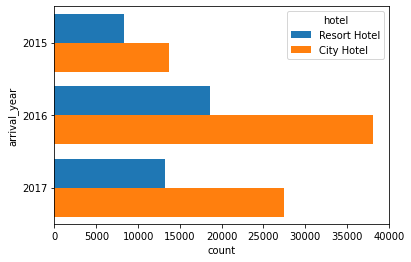

In [62]:
sns.countplot(y=data['arrival_year'],hue=data['hotel'],saturation=1)

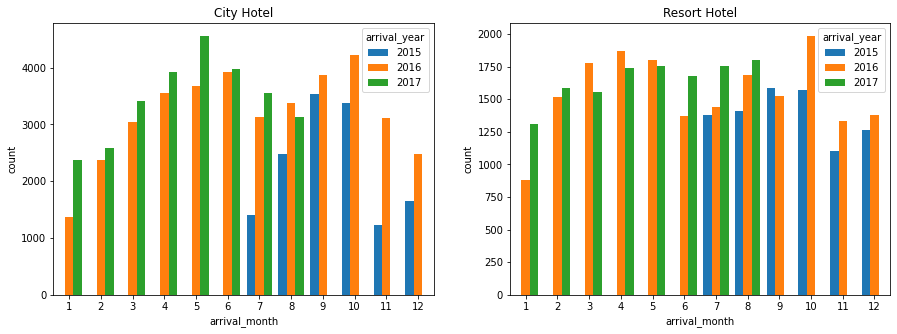

In [63]:
fig,ax = plt.subplots(1,2, figsize=(15,5))

sns.countplot(x='arrival_month', hue='arrival_year', data=city_data, saturation=1,ax=ax[0])
ax[0].title.set_text('City Hotel')
sns.countplot(x='arrival_month', hue='arrival_year', data=resort_data, saturation=1,ax=ax[1])
ax[1].title.set_text('Resort Hotel')

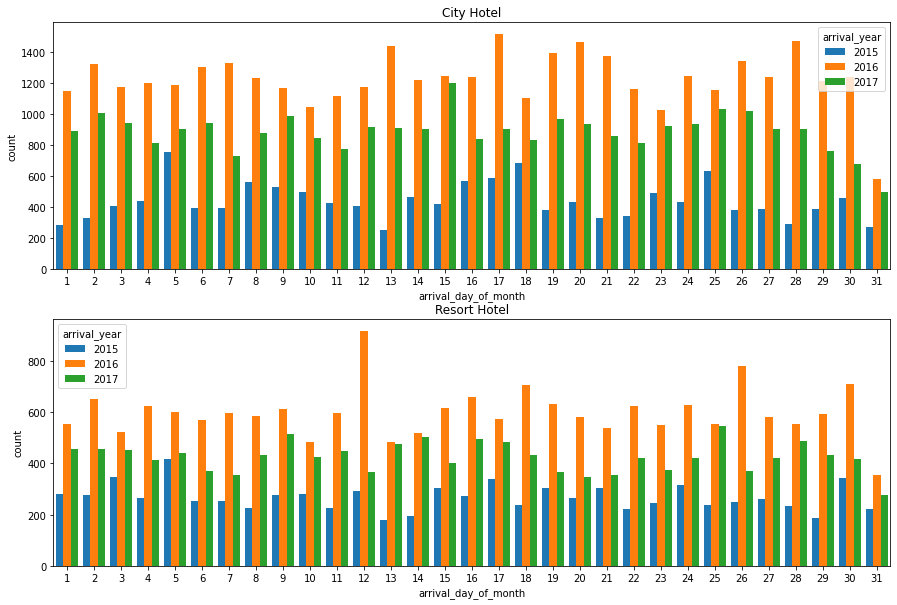

In [64]:
fig,ax = plt.subplots(2,1, figsize=(15,10))

sns.countplot(ax=ax[0], x='arrival_day_of_month',  hue='arrival_year', data=city_data, saturation=1)
ax[0].title.set_text('City Hotel')
sns.countplot(ax=ax[1], x='arrival_day_of_month',  hue='arrival_year', data=resort_data, saturation=1)
ax[1].title.set_text('Resort Hotel')

In [82]:
col_dtypes = city_data.dtypes
obj_cols = col_dtypes.sort_values()[-10:]
obj_cols

reservation_status      object
hotel                   object
deposit_type            object
assigned_room_type      object
distribution_channel    object
market_segment          object
country                 object
meal                    object
customer_type           object
reserved_room_type      object
dtype: object

In [88]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder

encoder = OneHotEncoder()
obj_enc = encoder.fit_transform(city_data[obj_cols.index]).toarray()
obj_enc.shape

(79329, 209)

In [97]:
obj_cols.index[0] + '-' + encoder.categories_[0]

array(['reservation_status-Canceled', 'reservation_status-Check-Out',
       'reservation_status-No-Show'], dtype=object)

In [101]:
corr_data = city_data.drop(labels=obj_cols.index,axis=1)
columns = corr_data.columns.to_list()

for col,category in zip(obj_cols.index,encoder.categories_):
    columns.extend(col + '-' + category)

len(columns)

238

In [99]:
columns

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_week_number',
 'arrival_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date',
 'arrival_date',
 'booking_date',
 'booked',
 'arrival_day_of_week',
 'cancel_lead_time',
 'stay_duration',
 'is_family',
 'reservation_status-Canceled',
 'reservation_status-Check-Out',
 'reservation_status-No-Show',
 'hotel-City Hotel',
 'deposit_type-No Deposit',
 'deposit_type-Non Refund',
 'deposit_type-Refundable',
 'assigned_room_type-A',
 'assigned_room_type-B

<AxesSubplot:>

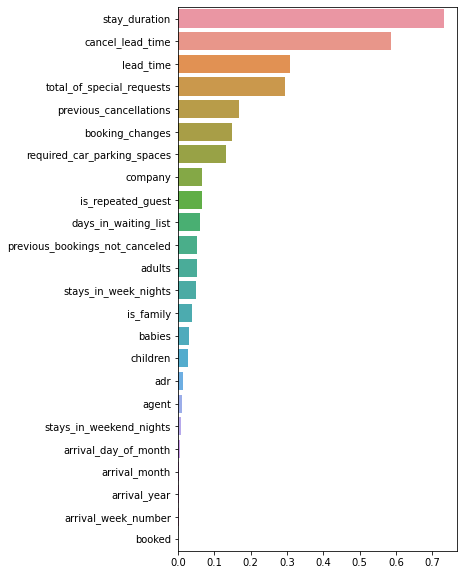

In [27]:
corr = city_data.corr()['is_canceled'].drop('is_canceled')
corr = abs(corr)
corr.sort_values(ascending=False,inplace=True)

fig,ax = plt.subplots(figsize=(5,10))
sns.barplot(y=corr.index, x=corr.values, ax=ax)

<AxesSubplot:>

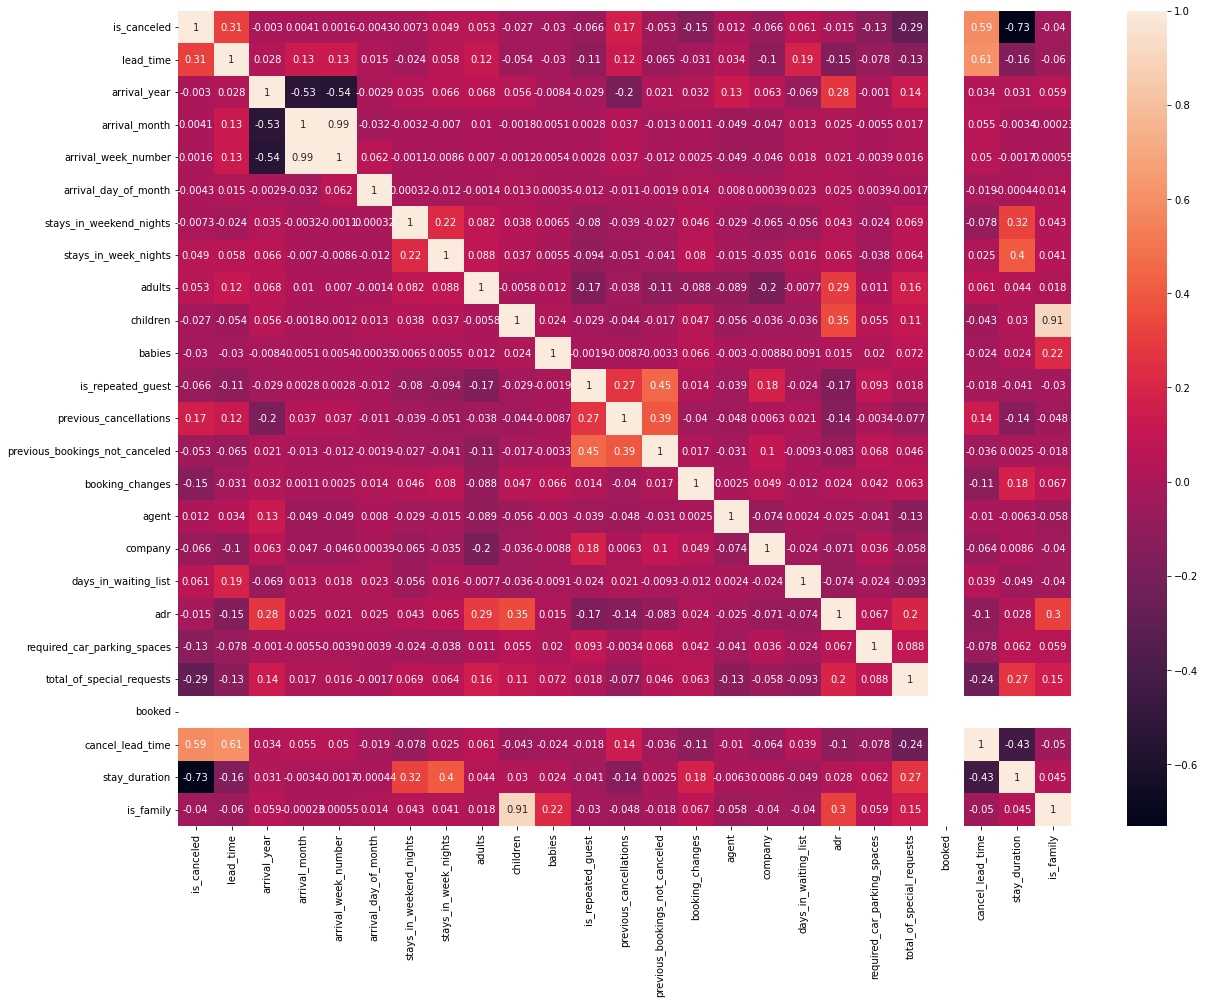

In [ ]:
fig,ax = plt.subplots(figsize=(20,15))

sns.heatmap(city_data.corr(),annot=True,ax=ax)

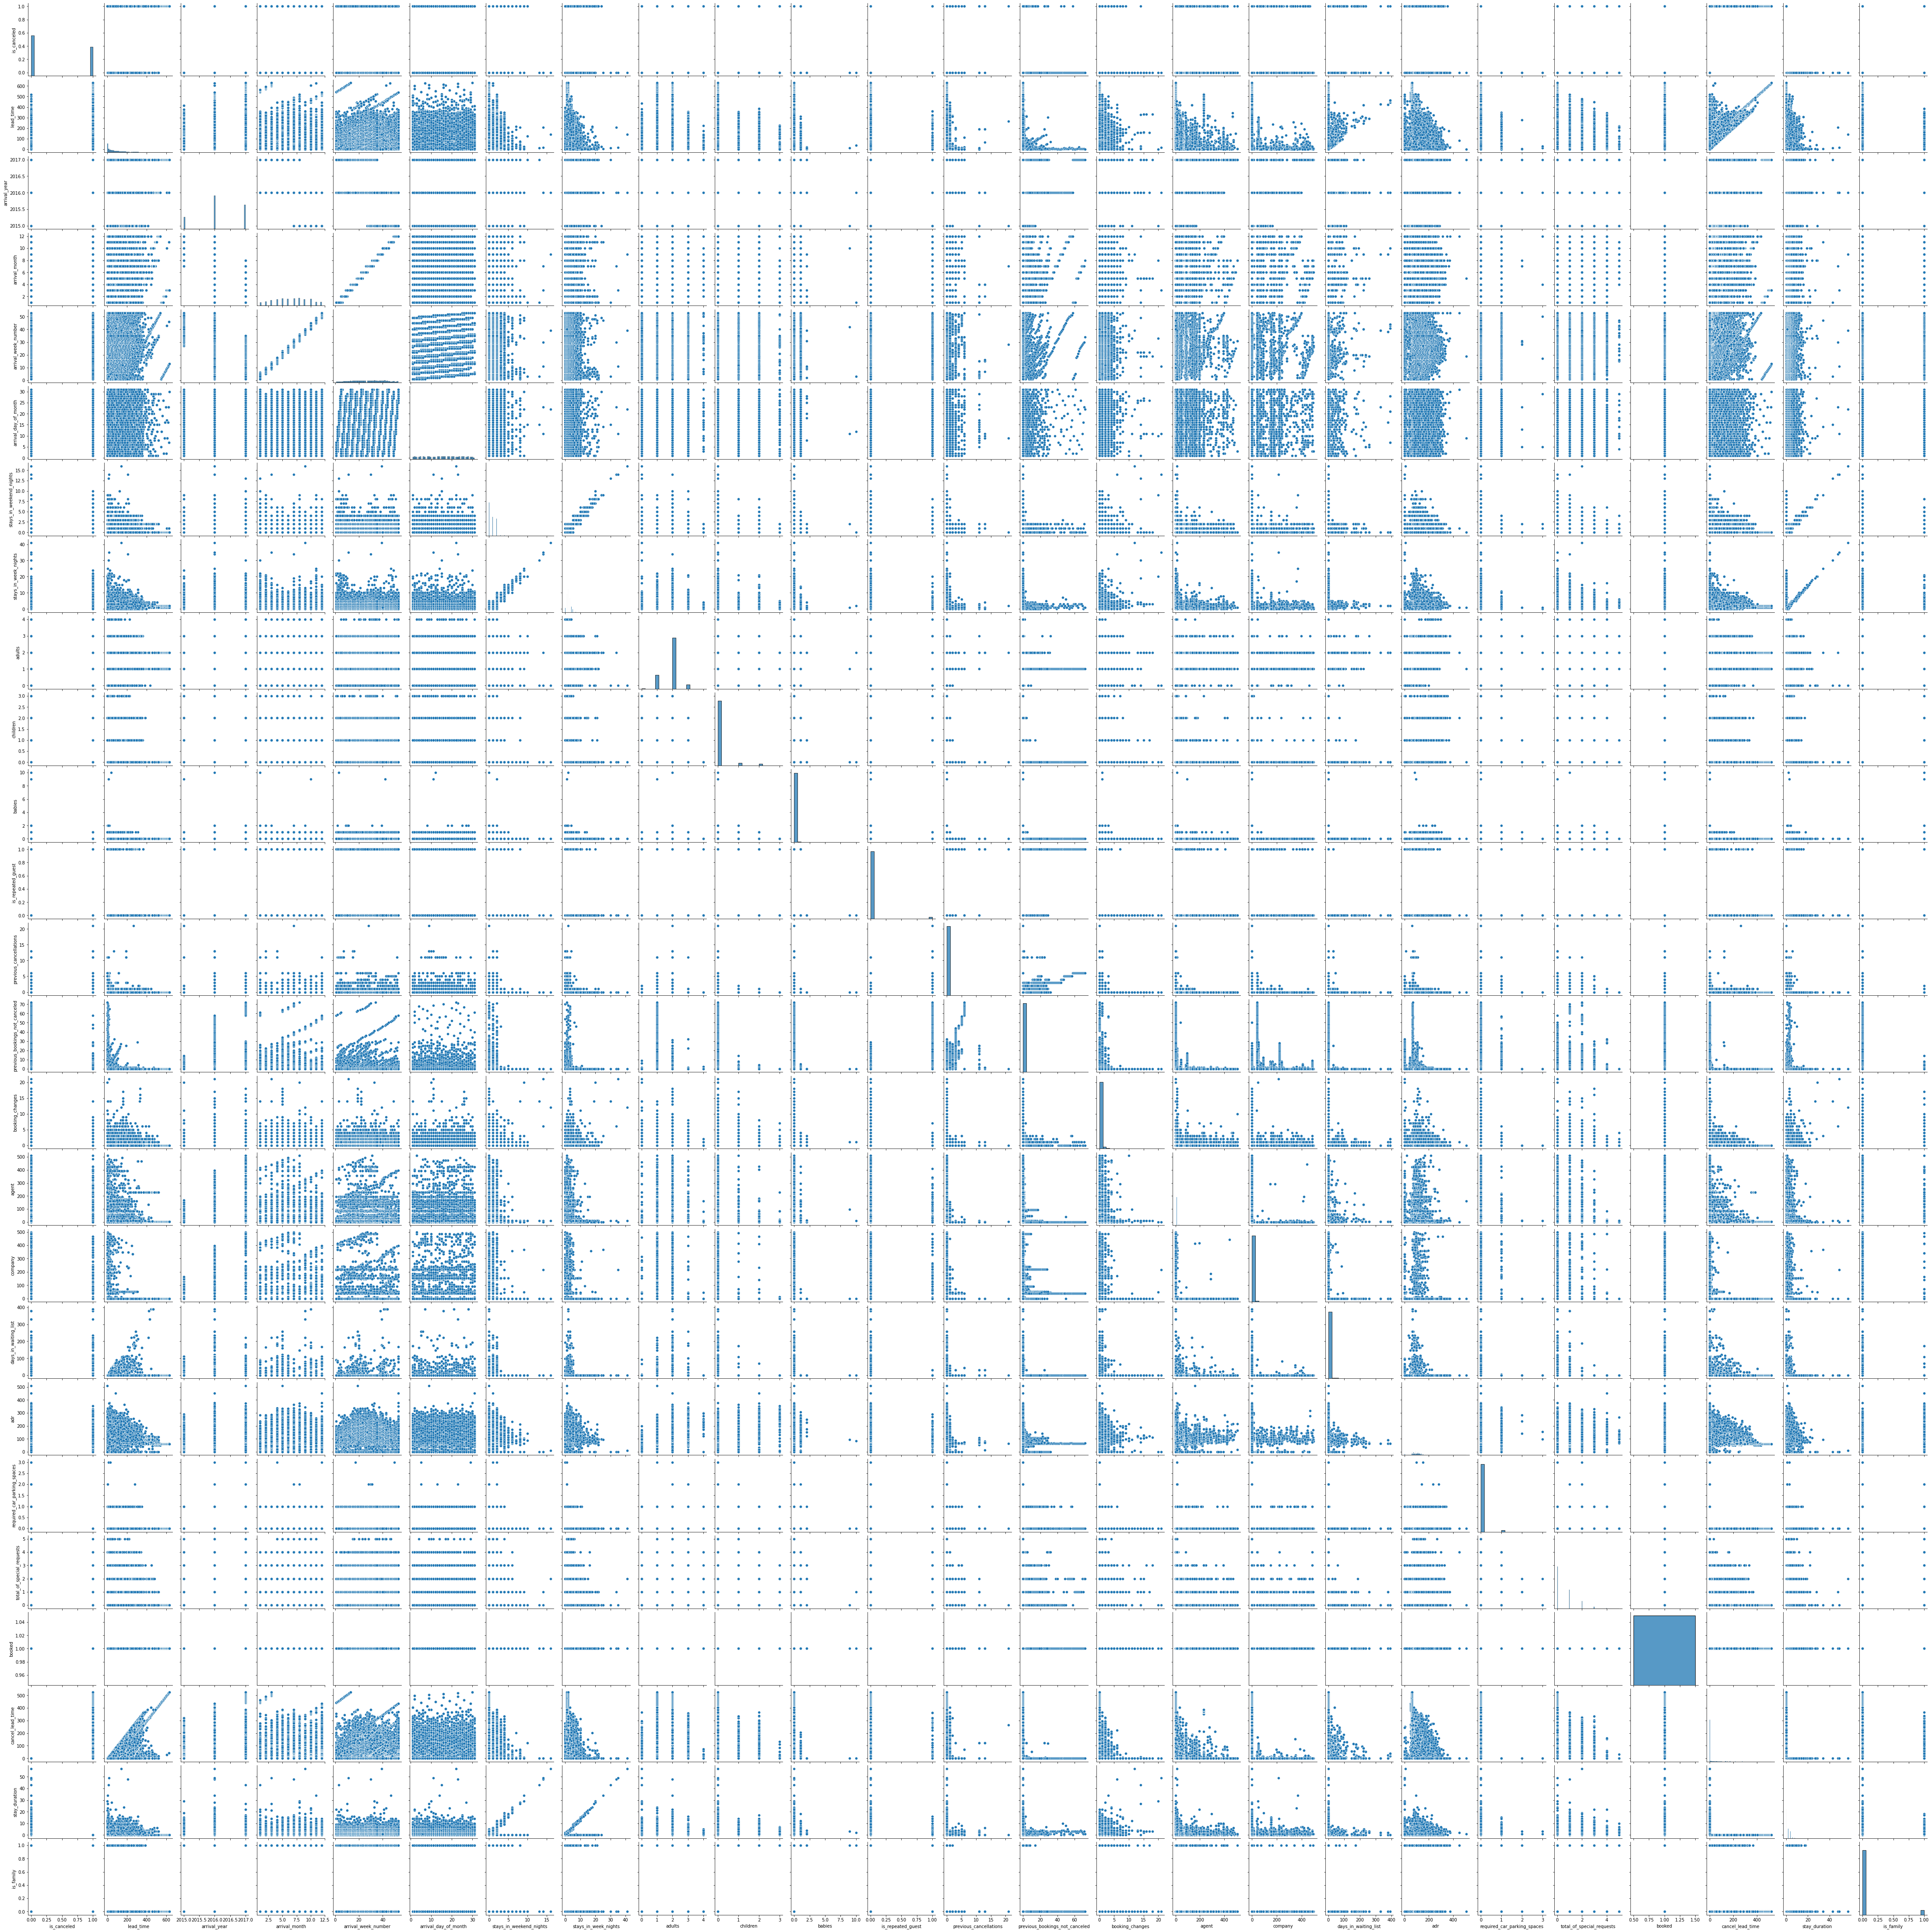

In [13]:
# sns.pairplot(city_data)

### Time Series Plot

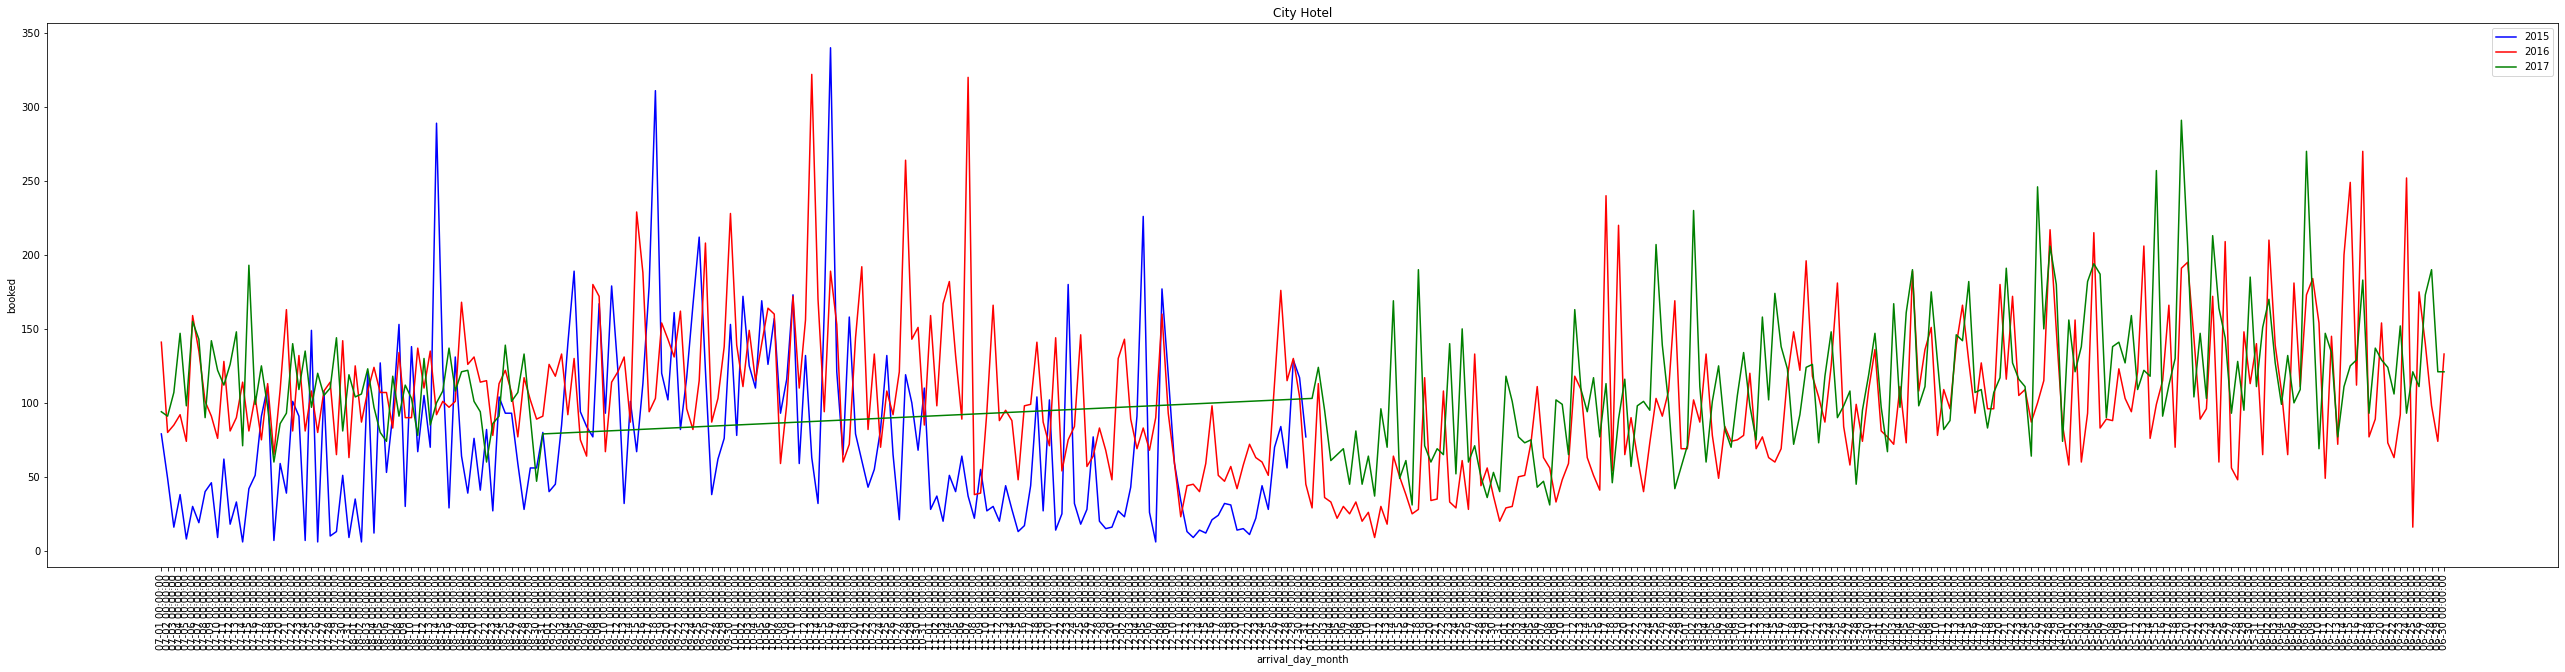

In [51]:
city_data_time = city_data.copy()
city_data_time['arrival_day_month'] = city_data_time.apply(lambda x: get_month_day(x['arrival_date']), axis=1)

bookings = city_data_time.groupby(['arrival_day_month','arrival_year']).sum().reset_index()

bookings_2015 = pd.DataFrame(bookings[bookings['arrival_year'] == 2015])
bookings_2015.set_index('arrival_day_month',inplace=True)
bookings_2016 = pd.DataFrame(bookings[bookings['arrival_year'] == 2016])
bookings_2016.set_index('arrival_day_month',inplace=True)
bookings_2017 = pd.DataFrame(bookings[bookings['arrival_year'] == 2017])
bookings_2017.set_index('arrival_day_month',inplace=True)

fig,ax = plt.subplots(figsize=(45,10))
plt.xticks(rotation=90)
sns.lineplot(x=bookings_2015.index, y='booked', data=bookings_2015, color="blue", label='2015',ax=ax)
sns.lineplot(x=bookings_2016.index, y='booked', data=bookings_2016, color="red", label='2016',ax=ax)
sns.lineplot(x=bookings_2017.index, y='booked', data=bookings_2017, color="green", label='2017',ax=ax)
ax.title.set_text('City Hotel')

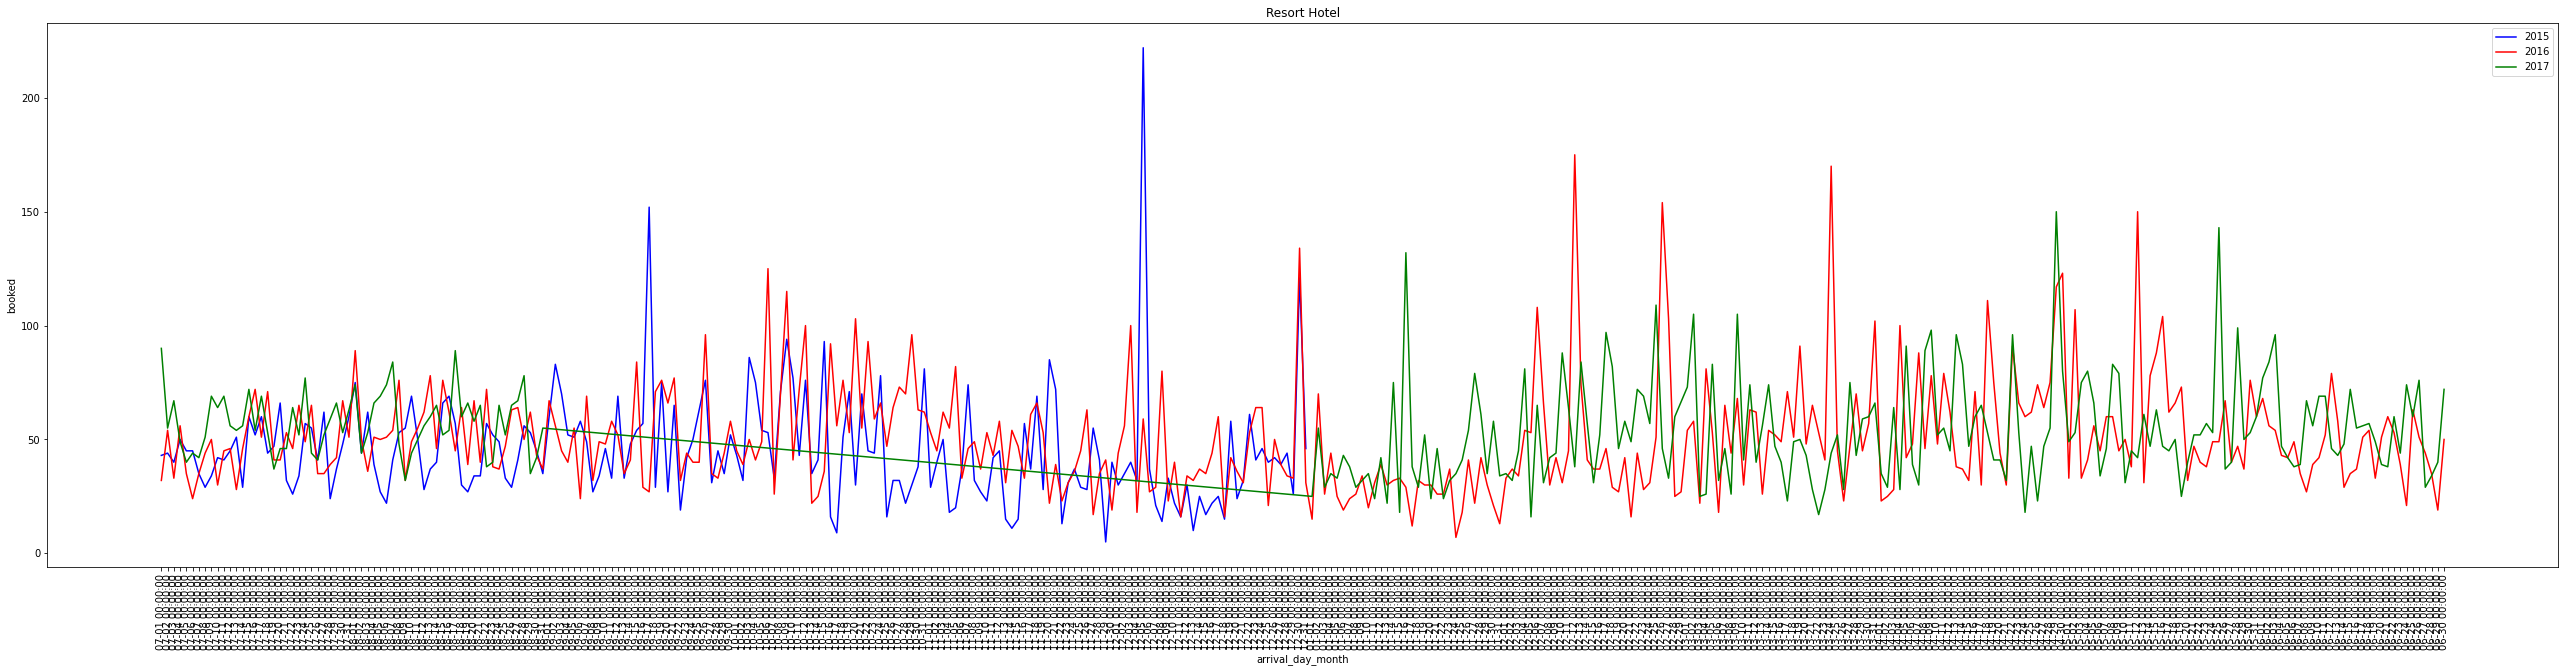

In [52]:
resort_data_time = resort_data.copy()
resort_data_time['arrival_day_month'] = resort_data_time.apply(lambda x: get_month_day(x['arrival_date']), axis=1)

bookings = resort_data_time.groupby(['arrival_day_month','arrival_year']).sum().reset_index()

bookings_2015 = pd.DataFrame(bookings[bookings['arrival_year'] == 2015])
bookings_2015.set_index('arrival_day_month',inplace=True)
bookings_2016 = pd.DataFrame(bookings[bookings['arrival_year'] == 2016])
bookings_2016.set_index('arrival_day_month',inplace=True)
bookings_2017 = pd.DataFrame(bookings[bookings['arrival_year'] == 2017])
bookings_2017.set_index('arrival_day_month',inplace=True)

fig,ax = plt.subplots(figsize=(45,10))
plt.xticks(rotation=90)
sns.lineplot(x=bookings_2015.index, y='booked', data=bookings_2015, color="blue", label='2015',ax=ax)
sns.lineplot(x=bookings_2016.index, y='booked', data=bookings_2016, color="red", label='2016',ax=ax)
sns.lineplot(x=bookings_2017.index, y='booked', data=bookings_2017, color="green", label='2017',ax=ax)
ax.title.set_text('Resort Hotel')

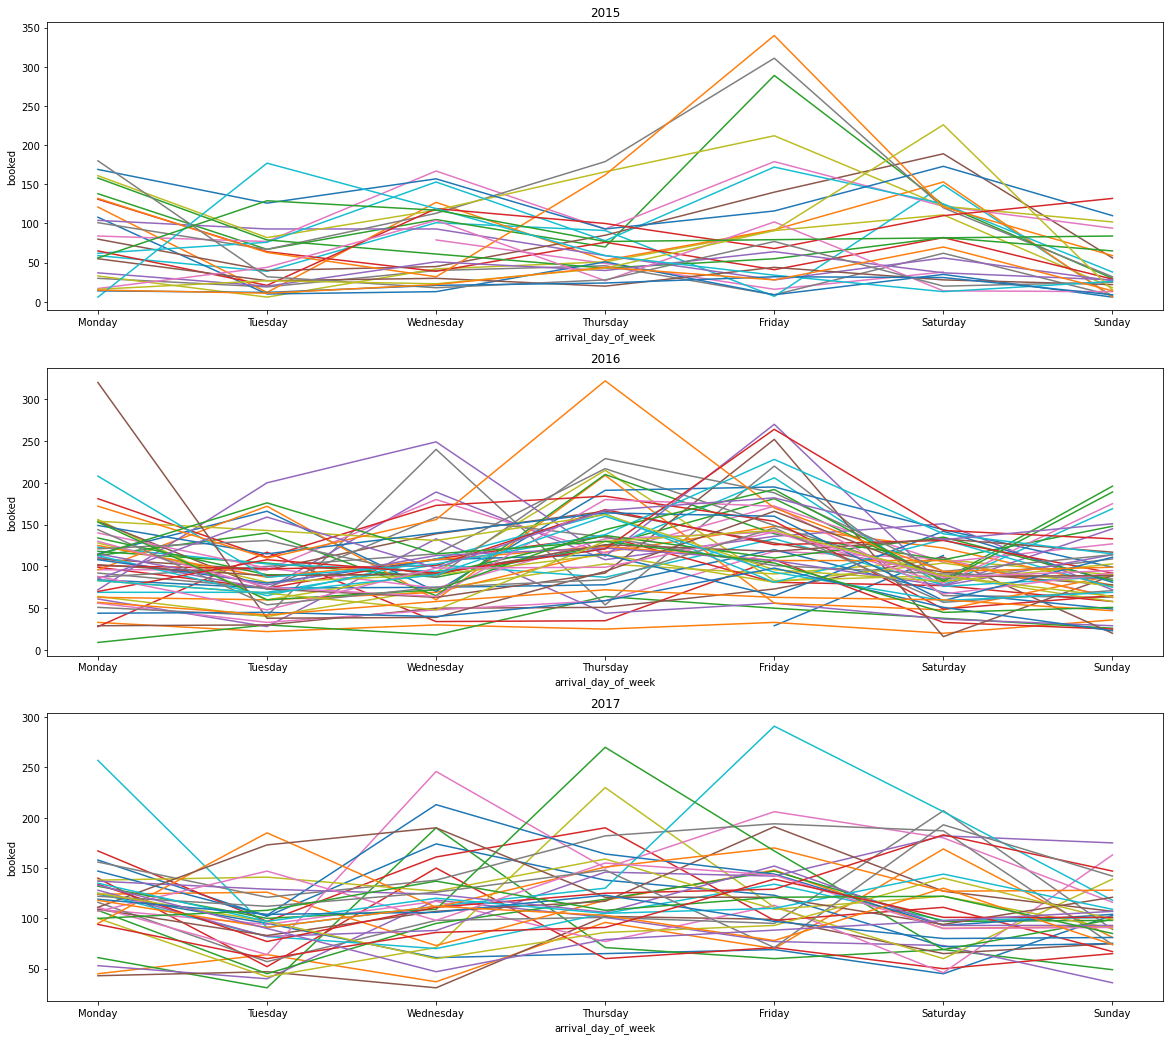

In [54]:
fig,ax = plt.subplots(3,1,figsize=(20,18),)
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
years = [2015,2016,2017]

week_data = city_data.groupby(['arrival_week_number','arrival_day_of_week','arrival_year']).sum().reset_index()

for year in years:
    year_week_data = week_data[week_data['arrival_year'] == year]

    for i in range(1,54):
        week_booking = pd.DataFrame(year_week_data[year_week_data['arrival_week_number'] == i].sort_index())
        week_booking.set_index('arrival_day_of_week', inplace=True)
        week_booking = week_booking.reindex(cats)
        week_booking.head()
        ax[years.index(year)].title.set_text(year)
        sns.lineplot(x=week_booking.index, y='booked', data=week_booking, ax=ax[years.index(year)])


[]

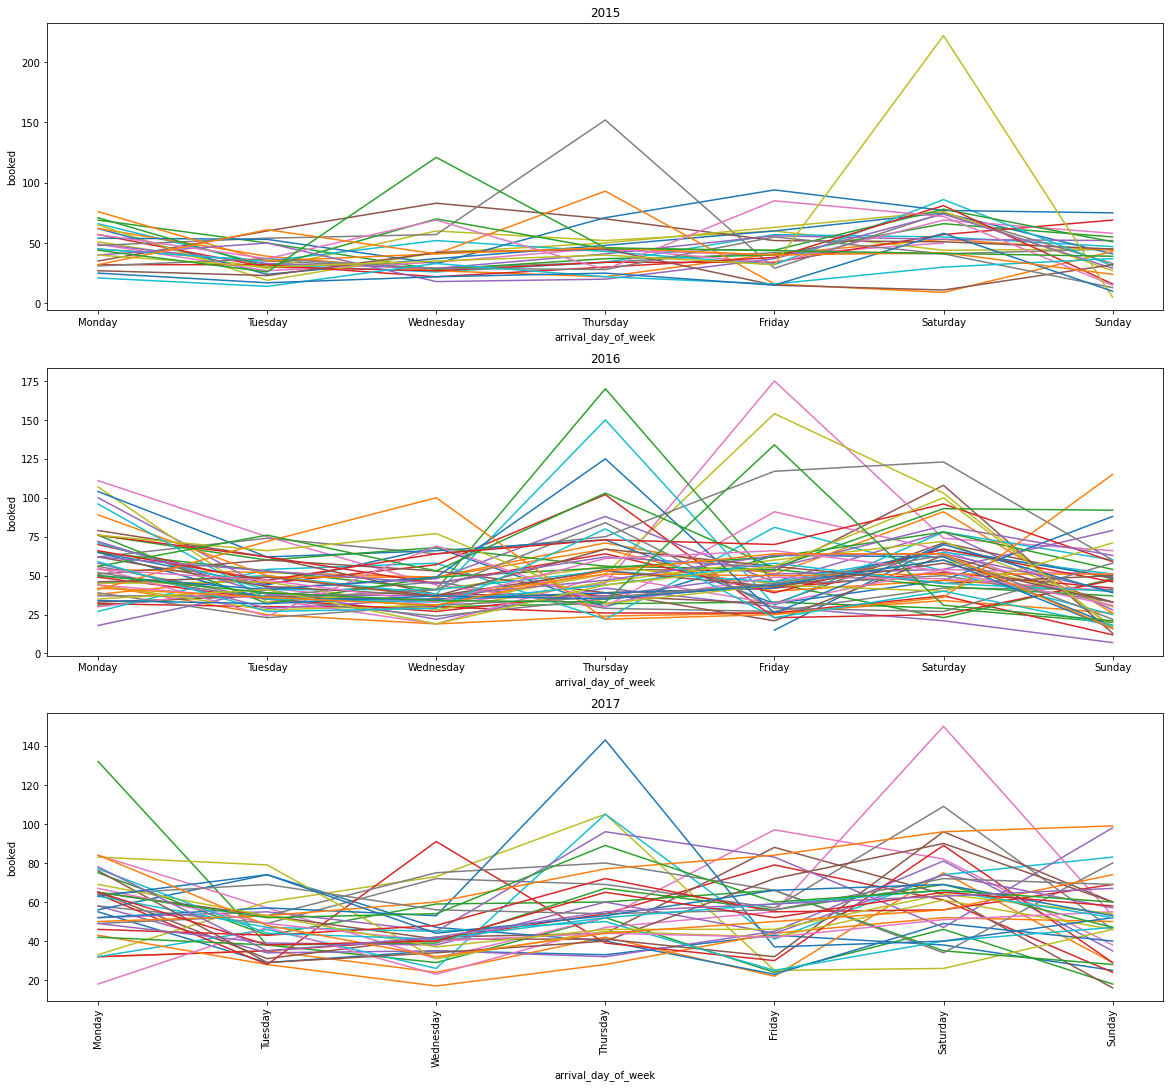

In [72]:
fig,ax = plt.subplots(3,1,figsize=(20,18),)
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
years = [2015,2016,2017]

week_data = resort_data.groupby(['arrival_week_number','arrival_day_of_week','arrival_year']).sum().reset_index()

for year in years:
    year_week_data = week_data[week_data['arrival_year'] == year]

    for i in range(1,54):
        week_booking = pd.DataFrame(year_week_data[year_week_data['arrival_week_number'] == i].sort_index())
        week_booking.set_index('arrival_day_of_week', inplace=True)
        week_booking = week_booking.reindex(cats)
        week_booking.head()
        ax[years.index(year)].title.set_text(year)
        sns.lineplot(x=week_booking.index, y='booked', data=week_booking, ax=ax[years.index(year)])



### Lead time Analysis

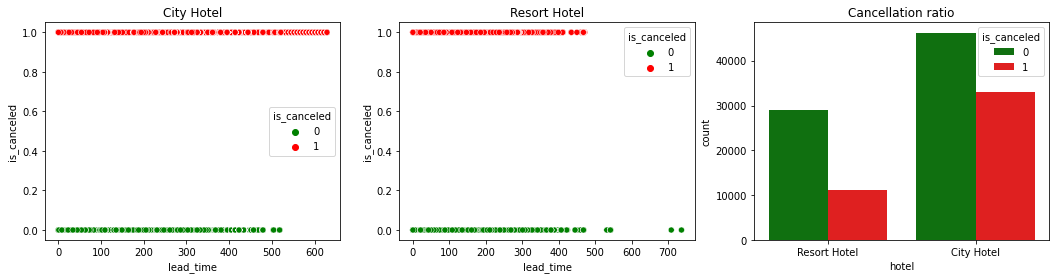

In [73]:
fig,ax = plt.subplots(1,3, figsize=(18,4))

sns.scatterplot(x='lead_time',y='is_canceled',hue='is_canceled',ax=ax[0],data=city_data,palette=['green','red'])
ax[0].title.set_text('City Hotel')
sns.scatterplot(x='lead_time',y='is_canceled',hue='is_canceled',ax=ax[1],data=resort_data,palette=['green','red'])
ax[1].title.set_text('Resort Hotel')
sns.countplot(x='hotel',hue='is_canceled',ax=ax[2],data=data,palette=['green','red'])
ax[2].title.set_text('Cancellation ratio')

In [74]:
city_data[city_data['is_canceled'] == 0]

hotel  is_canceled  lead_time  arrival_year  arrival_month  \
40060   City Hotel            0          6          2015              7   
40066   City Hotel            0          3          2015              7   
40070   City Hotel            0         43          2015              7   
40071   City Hotel            0         43          2015              7   
40072   City Hotel            0         43          2015              7   
...            ...          ...        ...           ...            ...   
119385  City Hotel            0         23          2017              8   
119386  City Hotel            0        102          2017              8   
119387  City Hotel            0         34          2017              8   
119388  City Hotel            0        109          2017              8   
119389  City Hotel            0        205          2017              8   

        arrival_week_number  arrival_day_of_month  stays_in_weekend_nights  \
40060                    27                     1                        0   
40066                    27                     2                        0   
40070                    27                     3                        0   
40071                    27                     3                        0   
40072                    27                     3                        0   
...                     ...                   ...                      ...   
119385                   35                    30                        2   
119386                   35                    31                        2   
119387                   35                    31                        2   
119388                   35                    31                        2   
119389                   35                    29                        2   

        stays_in_week_nights  adults  children  babies meal country  \
40060                      2       1       0.0       0   HB     PRT   
40066                      3       1       0.0       0   HB     PRT   
40070                      2       2       0.0       0   HB     PRT   
40071                      2       2       0.0       0   HB     PRT   
40072                      2       2       0.0       0   HB     PRT   
...                      ...     ...       ...     ...  ...     ...   
119385                     5       2       0.0       0   BB     BEL   
119386                     5       3       0.0       0   BB     FRA   
119387                     5       2       0.0       0   BB     DEU   
119388                     5       2       0.0       0   BB     GBR   
119389                     7       2       0.0       0   HB     DEU   

       market_segment distribution_channel  is_repeated_guest  \
40060   Offline TA/TO                TA/TO                  0   
40066          Groups                TA/TO                  0   
40070          Groups                TA/TO                  0   
40071          Groups                TA/TO                  0   
40072          Groups                TA/TO                  0   
...               ...                  ...                ...   
119385  Offline TA/TO                TA/TO                  0   
119386      Online TA                TA/TO                  0   
119387      Online TA                TA/TO                  0   
119388      Online TA                TA/TO                  0   
119389      Online TA                TA/TO                  0   

        previous_cancellations  previous_bookings_not_canceled  \
40060                        0                               0   
40066                        0                               0   
40070                        0                               0   
40071                        0                               0   
40072                        0                               0   
...                        ...                             ...   
119385                       0                               0   
119386       

<AxesSubplot:ylabel='lead_time'>

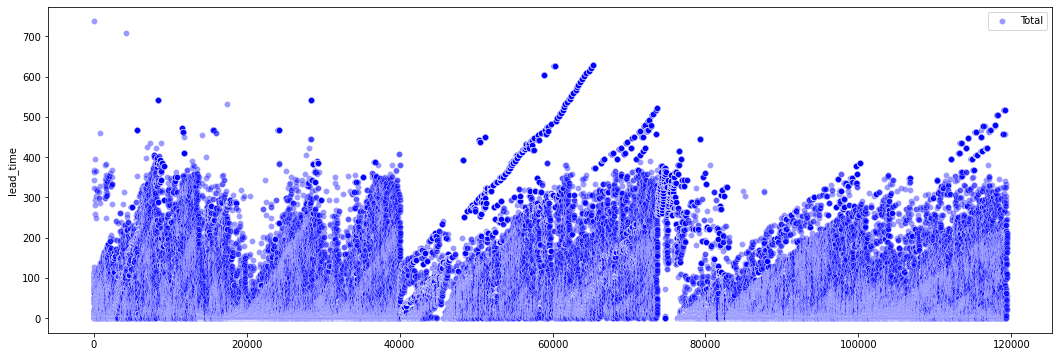

In [56]:
fig,ax = plt.subplots(figsize=(18,6))
sns.scatterplot(x=data.index,y='lead_time',data=data,label='Total',color='blue',ax=ax,alpha=0.4)

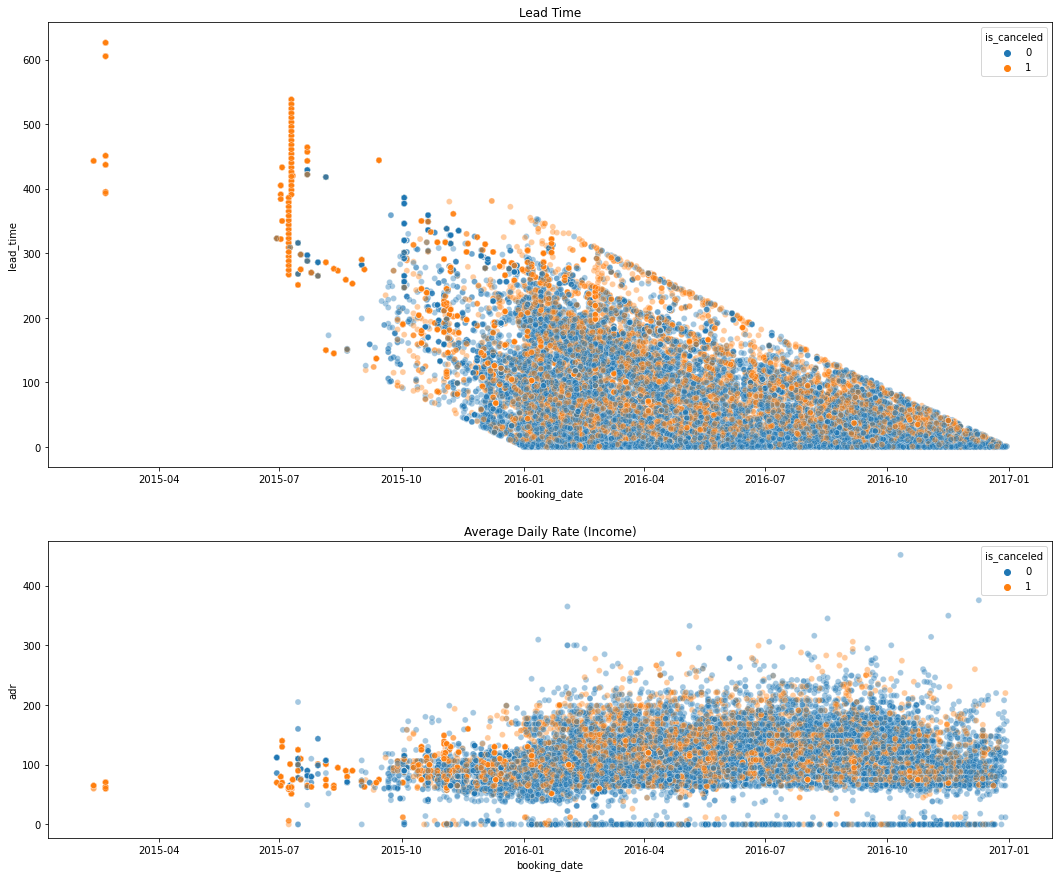

In [76]:
from sklearn.model_selection import train_test_split
sparse_data,_,__,___ = train_test_split(city_data,city_data.is_canceled,train_size=0.99,random_state=0)

# selected_data = sparse_data
selected_data = sparse_data[sparse_data['arrival_year'] == 2016]
# selected_data = selected_data[selected_data['is_canceled'] == 1]

fig,ax = plt.subplots(2,1,figsize=(18,15),gridspec_kw={'height_ratios':[3,2]})

sns.scatterplot(x='booking_date',y='lead_time',hue='is_canceled',data=selected_data,ax=ax[0],alpha=0.4)
ax[0].title.set_text('Lead Time')
sns.scatterplot(x='booking_date',y='adr',hue='is_canceled',data=selected_data,ax=ax[1],alpha=0.4)
ax[1].title.set_text('Average Daily Rate (Income)')

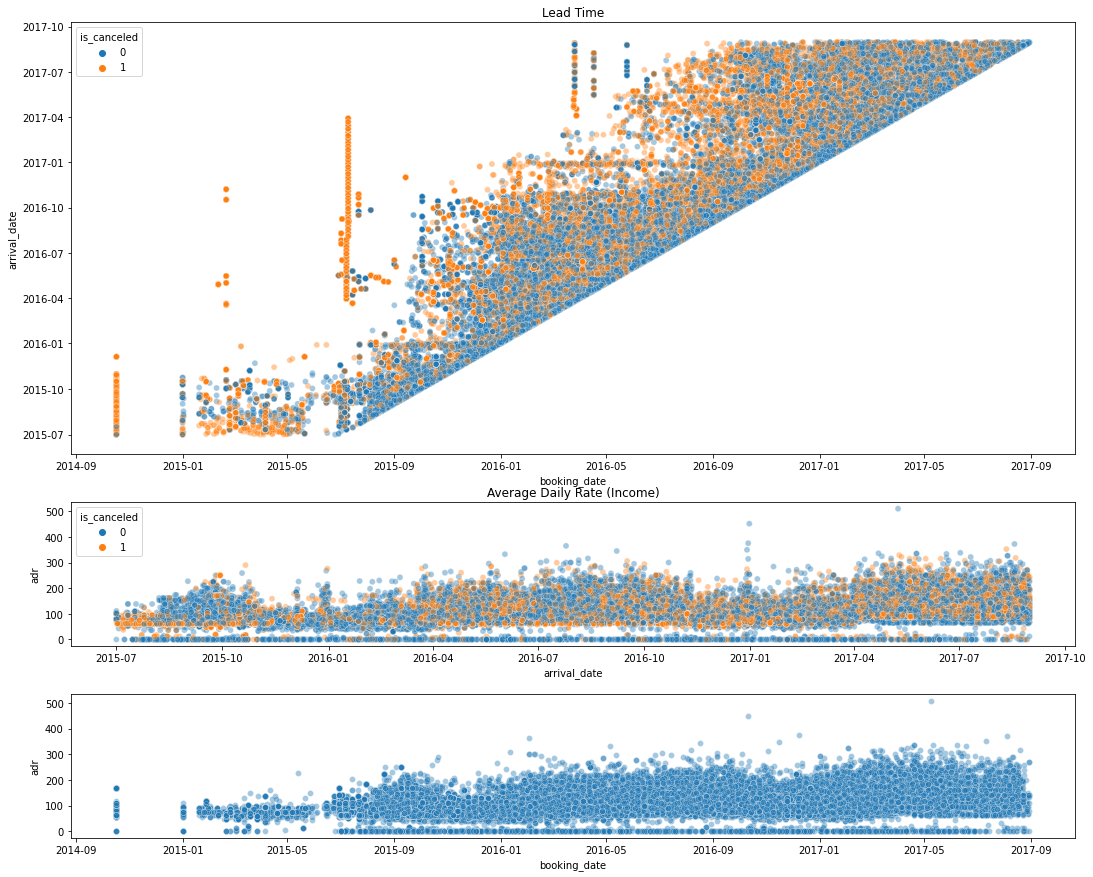

In [59]:
from sklearn.model_selection import train_test_split
sparse_data,_,__,___ = train_test_split(city_data,city_data.is_canceled,train_size=0.99,random_state=0)

selected_data = sparse_data
# selected_data = sparse_data[sparse_data['arrival_year'] == 2016]
# selected_data = selected_data[selected_data['is_canceled'] == 1]

fig,ax = plt.subplots(3,1,figsize=(18,15),gridspec_kw={'height_ratios':[3,1,1]})

sns.scatterplot(x='booking_date',y='arrival_date',hue='is_canceled',data=selected_data,ax=ax[0],alpha=0.4)
ax[0].title.set_text('Lead Time')
sns.scatterplot(x='arrival_date',y='adr',hue='is_canceled',data=selected_data,ax=ax[1],alpha=0.4)
ax[1].title.set_text('Average Daily Rate (Income)')
sns.scatterplot(x='booking_date',y='adr',hue='is_canceled',data=selected_data,ax=ax[2],alpha=0.4)
ax[1].title.set_text('Average Daily Rate (Income)')

In [78]:
cancel_pattern = city_data[(city_data['booking_date'] > np.datetime64('2015-07-01')) & 
            (city_data['booking_date'] < np.datetime64('2015-08-01')) & 
            (city_data['lead_time'] > 250) & (city_data['is_canceled'] == 1)]
cancel_pattern.head()

hotel  is_canceled  lead_time  arrival_year  arrival_month  \
48366  City Hotel            1        251          2016              3   
48367  City Hotel            1        251          2016              3   
48368  City Hotel            1        251          2016              3   
48369  City Hotel            1        251          2016              3   
48370  City Hotel            1        251          2016              3   

       arrival_week_number  arrival_day_of_month  stays_in_weekend_nights  \
48366                   13                    22                        0   
48367                   13                    22                        0   
48368                   13                    22                        0   
48369                   13                    22                        0   
48370                   13                    22                        0   

       stays_in_week_nights  adults  children  babies meal country  \
48366                     3       2       0.0       0   BB     PRT   
48367                     3       1       0.0       0   BB     PRT   
48368                     3       2       0.0       0   BB     PRT   
48369                     3       2       0.0       0   BB     PRT   
48370                     3       2       0.0       0   BB     PRT   

      market_segment distribution_channel  is_repeated_guest  \
48366         Groups                TA/TO                  0   
48367         Groups                TA/TO                  0   
48368         Groups                TA/TO                  0   
48369         Groups                TA/TO                  0   
48370         Groups                TA/TO                  0   

       previous_cancellations  previous_bookings_not_canceled  \
48366                       0                               0   
48367                       0                               0   
48368                       0                               0   
48369                       0                               0   
48370                       0                               0   

      reserved_room_type assigned_room_type  booking_changes deposit_type  \
48366                  A                  A                0   Non Refund   
48367                  A                  A                0   Non Refund   
48368                  A                  A                0   Non Refund   
48369                  A                  A                0   Non Refund   
48370                  A                  A                0   Non Refund   

       agent  company  days_in_waiting_list customer_type    adr  \
48366   29.0      0.0                    93     Transient  125.0   
48367   29.0      0.0                    93     Transient   90.0   
48368   29.0      0.0                    93     Transient  125.0   
48369   29.0      0.0                    93     Transient  125.0   
48370   29.0      0.0                    93     Transient  125.0   

       required_car_parking_spaces  total_of_special_requests  \
48366                            0                          0   
48367                            0                          0   
48368                            0                          0   
48369                            0                          0   
48370                            0                          0   

      reservation_status reservation_status_date arrival_date  \
48366           Canceled              2015-10-16   2016-03-22   
48367           Canceled              2015-10-16   2016-03-22   
48368           Canceled              2015-10-16   2016-03-22   
48369           Canceled              2015-10-16   2016-03-22   
48370           Canceled              2015-10-16   2016-03-22   

      arrival_day_month booking_date  booked arrival_day_of_week  \
48366    03-22 00:00:00   2015-07-15       1             Tuesday   
48367    03-22 00:00:00   2015-07-15       1             Tuesday   
48368    03-22 00:00:00   2015-07-15       1     

In [79]:
cancel_pattern.groupby(by=['market_segment','distribution_channel','reserved_room_type','customer_type'],axis=0).size().unstack(fill_value=0)

customer_type                                           Transient  \
market_segment distribution_channel reserved_room_type              
Groups         TA/TO                A                        1635   
Offline TA/TO  TA/TO                A                          73   

customer_type                                           Transient-Party  
market_segment distribution_channel reserved_room_type                   
Groups         TA/TO                A                                35  
Offline TA/TO  TA/TO                A                                47

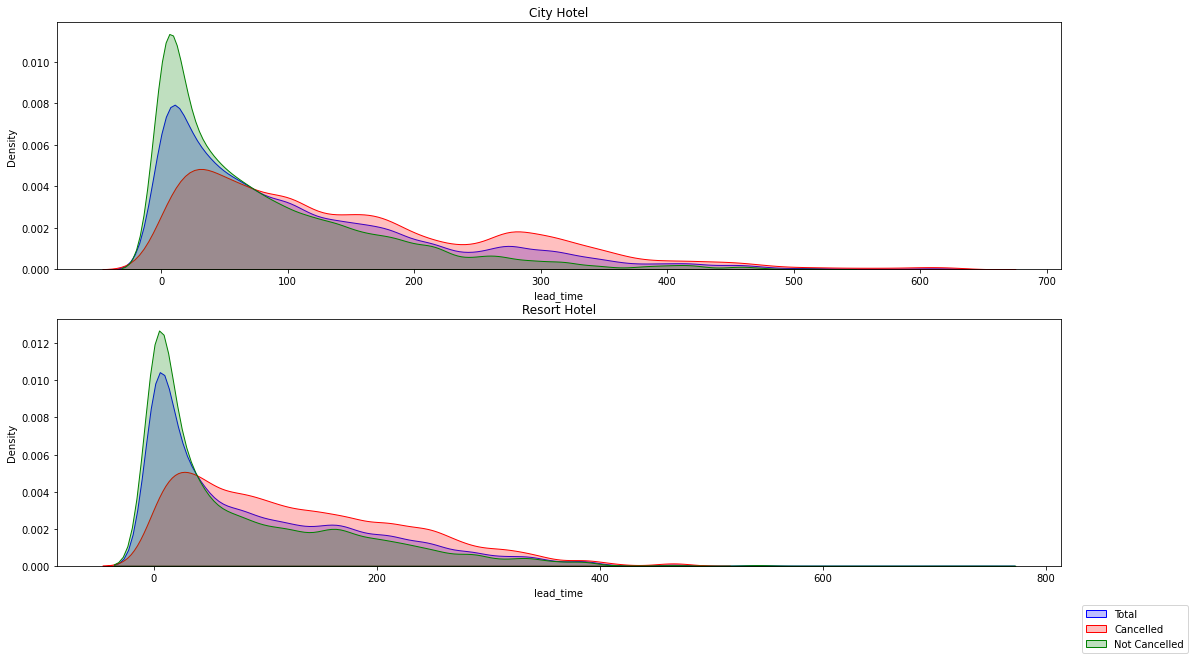

In [80]:
fig,ax = plt.subplots(2,1, figsize=(18,10))

sns.kdeplot(x='lead_time',data=city_data,label='Total',color='blue',ax=ax[0],shade=True)
sns.kdeplot(x='lead_time',data=city_data[city_data['is_canceled'] == 1],label='Cancelled',color='red',ax=ax[0],shade=True)
sns.kdeplot(x='lead_time',data=city_data[city_data['is_canceled'] == 0],label='Not Cancelled',color='green',ax=ax[0],shade=True)
ax[0].title.set_text('City Hotel')

sns.kdeplot(x='lead_time',data=resort_data,color='blue',ax=ax[1],shade=True)
sns.kdeplot(x='lead_time',data=resort_data[resort_data['is_canceled'] == 1],color='red',ax=ax[1],shade=True)
sns.kdeplot(x='lead_time',data=resort_data[resort_data['is_canceled'] == 0],color='green',ax=ax[1],shade=True)
ax[1].title.set_text('Resort Hotel')
fig.legend(loc="lower right")


<AxesSubplot:xlabel='cancel_lead_time', ylabel='Density'>

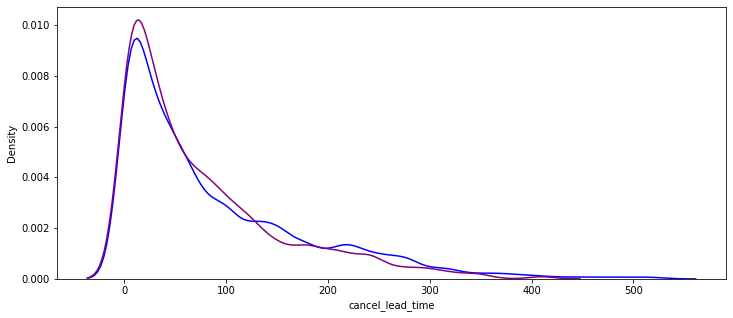

In [81]:
fig,ax = plt.subplots(figsize=(12,5))

sns.kdeplot(x='cancel_lead_time',data=city_data[city_data['is_canceled'] == 1],ax=ax,color='blue',label='City hotel')
sns.kdeplot(x='cancel_lead_time',data=resort_data[resort_data['is_canceled'] == 1],ax=ax,color='purple',label='Resort hotel')

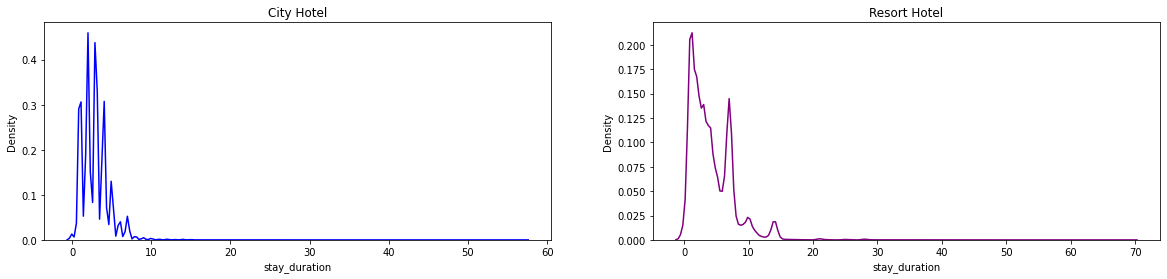

In [82]:
fig,ax = plt.subplots(1,2,figsize=(20,4))

sns.kdeplot(x='stay_duration',data=city_data[city_data['is_canceled'] == 0],ax=ax[0],color='blue')
ax[0].title.set_text('City Hotel')

sns.kdeplot(x='stay_duration',data=resort_data[resort_data['is_canceled'] == 0],ax=ax[1],color='purple')
ax[1].title.set_text('Resort Hotel')

### Family Analysis

In [83]:
family_data = data[data['is_family'] == 1]
family_data.head()

hotel  is_canceled  lead_time  arrival_year  arrival_month  \
13  Resort Hotel            0         18          2015              7   
45  Resort Hotel            1         47          2015              7   
55  Resort Hotel            0          1          2015              7   
65  Resort Hotel            0         10          2015              7   
87  Resort Hotel            1         79          2015              7   

    arrival_week_number  arrival_day_of_month  stays_in_weekend_nights  \
13                   27                     1                        0   
45                   27                     2                        2   
55                   27                     2                        0   
65                   27                     3                        0   
87                   27                     3                        6   

    stays_in_week_nights  adults  children  babies meal country  \
13                     4       2       1.0       0   HB     ESP   
45                     5       2       2.0       0   BB     PRT   
55                     1       2       2.0       0   BB     ESP   
65                     2       2       2.0       0   BB     USA   
87                    15       2       1.0       0   BB     PRT   

   market_segment distribution_channel  is_repeated_guest  \
13      Online TA                TA/TO                  0   
45      Online TA                TA/TO                  0   
55         Direct               Direct                  0   
65      Online TA                TA/TO                  0   
87  Offline TA/TO                TA/TO                  0   

    previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
13                       0                               0                  G   
45                       0                               0                  G   
55                       0                               0                  C   
65                       0                               0                  G   
87                       0                               0                  A   

   assigned_room_type  booking_changes deposit_type  agent  company  \
13                  G                1   No Deposit  241.0      0.0   
45                  G                0   No Deposit  240.0      0.0   
55                  C                0   No Deposit    0.0      0.0   
65                  H                0   No Deposit  240.0      0.0   
87                  A                0   No Deposit  242.0      0.0   

    days_in_waiting_list customer_type     adr  required_car_parking_spaces  \
13                     0     Transient  154.77                            0   
45                     0     Transient  153.00                            0   
55                     0     Transient  107.00                            1   
65                     0     Transient  153.00                            1   
87                     0     Transient  108.73                            0   

    total_of_special_requests reservation_status reservation_status_date  \
13                          1          Check-Out              2015-07-05   
45                          0           Canceled              2015-06-02   
55                          2          Check-Out              2015-07-03   
65                          0          Check-Out              2015-07-05   
87                          2           Canceled              2015-04-15   

   arrival_date arrival_day_month booking_date  booked arrival_day_of_week  \
13   2015-07-01    07-01 00:00:00   2015-06-13       1           Wednesday   
45   2015-07-02    07-02 00:00:00   2015-05-16       1            Thursday   
55   2015-07-02    07-02 00:00:00   2015-07-01       1            Thursday   
65   2015-07-03    07-03 00:00:00   2015-06-23       1              Friday   
87   2015-07-03    07-03 00:00:00   2015-04-15       1              Friday   

    cancel_lead_time  stay_duration  is_fa

<AxesSubplot:xlabel='is_family', ylabel='count'>

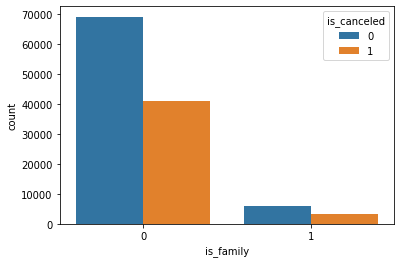

In [84]:
sns.countplot(x='is_family',hue='is_canceled',data=data)

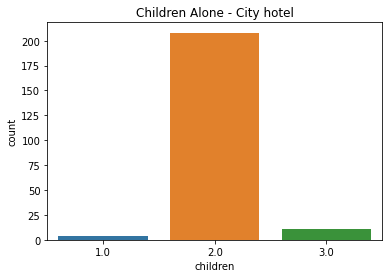

In [85]:
no_adult = city_data[city_data['adults'] == 0]
all_children = no_adult[no_adult['children'] != 0]

all_children['children'].value_counts()

fig,ax = plt.subplots()
sns.countplot(x='children',data=all_children,ax=ax)
ax.title.set_text('Children Alone - City hotel')

<AxesSubplot:xlabel='adults', ylabel='count'>

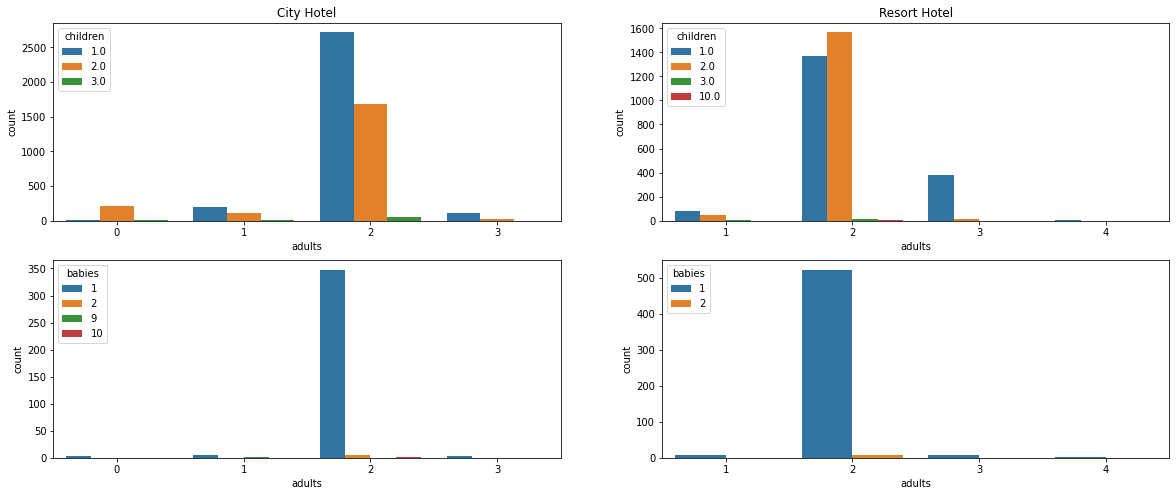

In [86]:
fig,ax = plt.subplots(2,2, figsize=(20,8))

sns.countplot(x='adults',hue='children',data=city_data[city_data['children'] != 0],ax=ax[0,0])
ax[0,0].title.set_text('City Hotel')
sns.countplot(x='adults',hue='children',data=resort_data[resort_data['children'] != 0],ax=ax[0,1])
ax[0,1].title.set_text('Resort Hotel')
sns.countplot(x='adults',hue='babies',data=city_data[city_data['babies'] != 0],ax=ax[1,0])
sns.countplot(x='adults',hue='babies',data=resort_data[resort_data['babies'] != 0],ax=ax[1,1])

### Agent Analysis

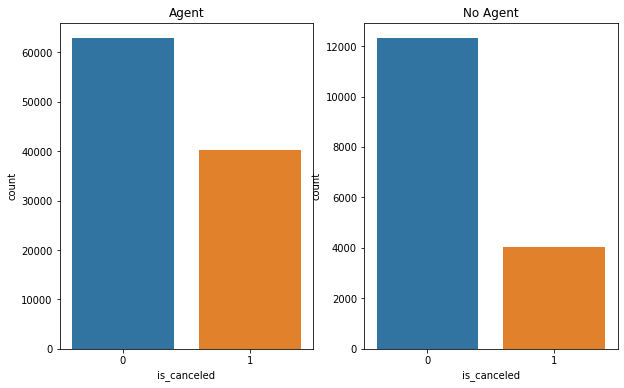

In [63]:
fig,ax = plt.subplots(1,2,figsize=(10,6))

sns.countplot(x=data[data['agent'] != 0]['is_canceled'], ax=ax[0])
ax[0].title.set_text('Agent')

sns.countplot(x=data[data['agent'] == 0]['is_canceled'], ax=ax[1])
ax[1].title.set_text('No Agent')

<AxesSubplot:>

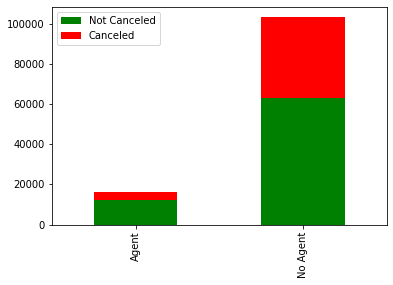

In [ ]:
no_agent_not_canceled = data[data['is_canceled'] == 0]['agent'].value_counts()[0]
agent_not_canceled = data[data['is_canceled'] == 0]['agent'].value_counts().sum()-no_agent_not_canceled
no_agent_canceled = data[data['is_canceled'] != 0]['agent'].value_counts()[0]
agent_canceled = data[data['is_canceled'] != 0]['agent'].value_counts().sum()-no_agent_canceled

cancelled_agent = pd.DataFrame({
        'Not Canceled': [no_agent_not_canceled, agent_not_canceled],
        'Canceled': [no_agent_canceled, agent_canceled]},
    index=['Agent','No Agent']) 

cancelled_agent.plot(kind='bar', stacked=True, color=['green','red'])

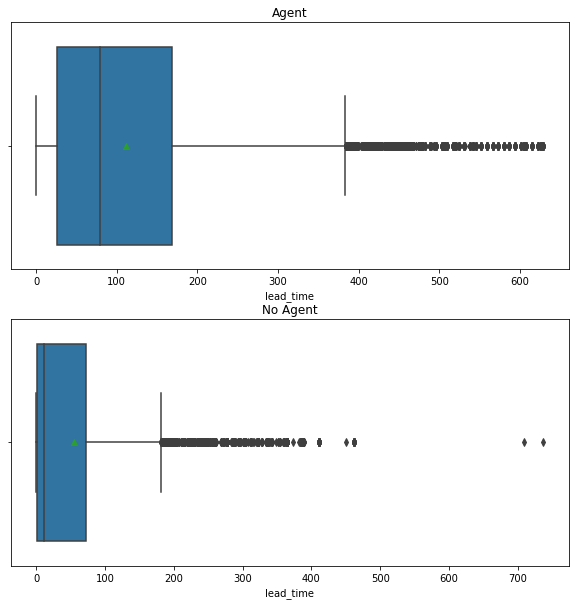

In [64]:
data[data['agent'] != 0]['lead_time']

fig,ax = plt.subplots(2,1,figsize=(10,10))

sns.boxplot(x=data[data['agent'] != 0]['lead_time'], ax=ax[0],showmeans=True)
ax[0].title.set_text('Agent')
sns.boxplot(x=data[data['agent'] == 0]['lead_time'], ax=ax[1],showmeans=True)
ax[1].title.set_text('No Agent')

### Ghost Analysis

In [ ]:
ghost_data = data[data['reservation_status'] == 'No-Show']
ghost_data.head()

hotel  is_canceled  lead_time  arrival_year  arrival_month  \
122  Resort Hotel            1         36          2015              7   
328  Resort Hotel            1         55          2015              7   
343  Resort Hotel            1         47          2015              7   
467  Resort Hotel            1          6          2015              7   
472  Resort Hotel            1          3          2015              7   

     arrival_week_number  arrival_day_of_month  stays_in_weekend_nights  \
122                   27                     4                        0   
328                   29                    12                        4   
343                   29                    12                        2   
467                   29                    17                        0   
472                   29                    17                        0   

     stays_in_week_nights  adults  children  babies meal country  \
122                     1       1       0.0       0   BB     PRT   
328                    10       2      10.0       0   BB     PRT   
343                     3       2       0.0       0   BB     PRT   
467                     2       2       0.0       0   BB     PRT   
472                     2       1       0.0       0   BB     PRT   

    market_segment distribution_channel  is_repeated_guest  \
122         Direct               Direct                  0   
328  Offline TA/TO                TA/TO                  0   
343      Online TA                TA/TO                  0   
467      Online TA                TA/TO                  0   
472  Offline TA/TO                TA/TO                  0   

     previous_cancellations  previous_bookings_not_canceled  \
122                       0                               0   
328                       0                               0   
343                       0                               0   
467                       0                               0   
472                       0                               0   

    reserved_room_type assigned_room_type  booking_changes deposit_type  \
122                  E                  G                1   No Deposit   
328                  D                  D                2   No Deposit   
343                  F                  F                0   No Deposit   
467                  A                  C                0   No Deposit   
472                  A                  A                0   No Deposit   

     agent  company  days_in_waiting_list customer_type     adr  \
122  250.0      0.0                     0     Transient  123.00   
328    8.0      0.0                     0      Contract  133.16   
343  241.0      0.0                     0     Transient  103.80   
467  241.0      0.0                     0     Transient  110.50   
472    5.0      0.0                     0     Transient  107.60   

     required_car_parking_spaces  total_of_special_requests  \
122                            0                          0   
328                            0                          1   
343                            0                          0   
467                            0                          1   
472                            0                          0   

    reservation_status reservation_status_date arrival_date arrival_day_month  \
122            No-Show              2015-07-04   2015-07-04    07-04 00:00:00   
328            No-Show              2015-07-12   2015-07-12    07-12 00:00:00   
343            No-Show              2015-07-12   2015-07-12    07-12 00:00:00   
467            No-Show              2015-07-17   2015-07-17    07-17 00:00:00   
472            No-Show              2015-07-17   2015-07-17    07-17 00:00:00   

     booked arrival_day_of_week  cancel_lead_time  stay_duration  is_family  
122       1            Saturday                 0              0          0  
328       1              Sunday                 0              0          1  
3

In [ ]:
ghost_data.is_canceled.value_counts()

1    1207
Name: is_canceled, dtype: int64

### Country Analysis

<AxesSubplot:xlabel='country', ylabel='count'>

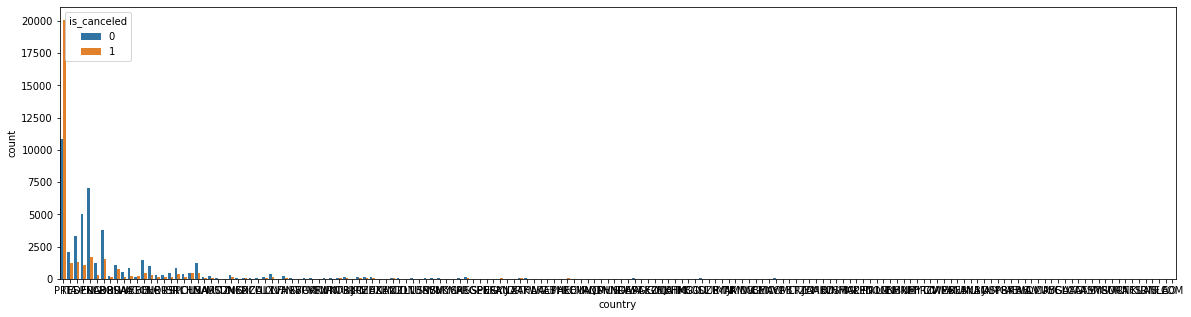

In [99]:
fig,ax = plt.subplots(figsize=(20,5))

sns.countplot(x='country',hue='is_canceled',data=city_data)

### Rough note

<AxesSubplot:>

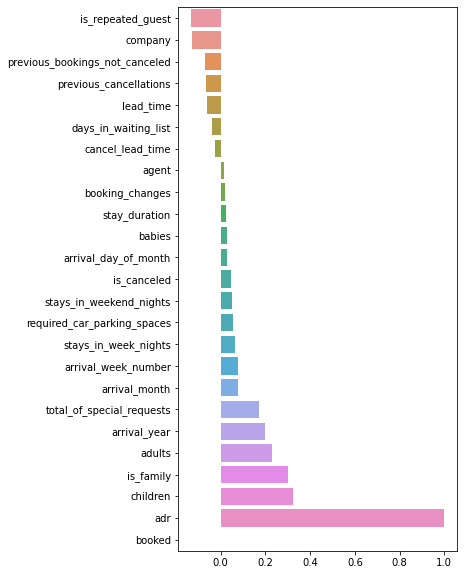

In [33]:
corr = data.corr()['adr'].sort_values()

fig,ax = plt.subplots(figsize=(5,10))

sns.barplot(y=corr.index, x=corr.values)

In [36]:
data.head()

hotel  is_canceled  lead_time  arrival_year  arrival_month  \
0  Resort Hotel            0        342          2015              7   
1  Resort Hotel            0        737          2015              7   
2  Resort Hotel            0          7          2015              7   
3  Resort Hotel            0         13          2015              7   
4  Resort Hotel            0         14          2015              7   

   arrival_week_number  arrival_day_of_month  stays_in_weekend_nights  \
0                   27                     1                        0   
1                   27                     1                        0   
2                   27                     1                        0   
3                   27                     1                        0   
4                   27                     1                        0   

   stays_in_week_nights  adults  children  babies meal country market_segment  \
0                     0       2       0.0       0   BB     PRT         Direct   
1                     0       2       0.0       0   BB     PRT         Direct   
2                     1       1       0.0       0   BB     GBR         Direct   
3                     1       1       0.0       0   BB     GBR      Corporate   
4                     2       2       0.0       0   BB     GBR      Online TA   

  distribution_channel  is_repeated_guest  previous_cancellations  \
0               Direct                  0                       0   
1               Direct                  0                       0   
2               Direct                  0                       0   
3            Corporate                  0                       0   
4                TA/TO                  0                       0   

   previous_bookings_not_canceled reserved_room_type assigned_room_type  \
0                               0                  C                  C   
1                               0                  C                  C   
2                               0                  A                  C   
3                               0                  A                  A   
4                               0                  A                  A   

   booking_changes deposit_type  agent  company  days_in_waiting_list  \
0                3   No Deposit    0.0      0.0                     0   
1                4   No Deposit    0.0      0.0                     0   
2                0   No Deposit    0.0      0.0                     0   
3                0   No Deposit  304.0      0.0                     0   
4                0   No Deposit  240.0      0.0                     0   

  customer_type   adr  required_car_parking_spaces  total_of_special_requests  \
0     Transient   0.0                            0                          0   
1     Transient   0.0                            0                          0   
2     Transient  75.0                            0                          0   
3     Transient  75.0                            0                          0   
4     Transient  98.0                            0                          1   

  reservation_status reservation_status_date arrival_date arrival_day_month  \
0          Check-Out              2015-07-01   2015-07-01    07-01 00:00:00   
1          Check-Out              2015-07-01   2015-07-01    07-01 00:00:00   
2          Check-Out              2015-07-02   2015-07-01    07-01 00:00:00   
3          Check-Out              2015-07-02   2015-07-01    07-01 00:00:00   
4          Check-Out              2015-07-03   2015-07-01    07-01 00:00:00   

   booked arrival_day_of_week  cancel_lead_time  stay_duration  is_family  
0       1           Wednesday                 0              0          0  
1       1           Wednesday                 0              0          0  
2       1           Wednesday                 0              1          0  
3       1           Wednesday                 0              1          0  
4   

In [38]:
canceled_data = data[data['is_canceled'] == 1]
canceled_data.head()

hotel  is_canceled  lead_time  arrival_year  arrival_month  \
8   Resort Hotel            1         85          2015              7   
9   Resort Hotel            1         75          2015              7   
10  Resort Hotel            1         23          2015              7   
27  Resort Hotel            1         60          2015              7   
32  Resort Hotel            1         96          2015              7   

    arrival_week_number  arrival_day_of_month  stays_in_weekend_nights  \
8                    27                     1                        0   
9                    27                     1                        0   
10                   27                     1                        0   
27                   27                     1                        2   
32                   27                     1                        2   

    stays_in_week_nights  adults  children  babies meal country  \
8                      3       2       0.0       0   BB     PRT   
9                      3       2       0.0       0   HB     PRT   
10                     4       2       0.0       0   BB     PRT   
27                     5       2       0.0       0   BB     PRT   
32                     8       2       0.0       0   BB     PRT   

   market_segment distribution_channel  is_repeated_guest  \
8       Online TA                TA/TO                  0   
9   Offline TA/TO                TA/TO                  0   
10      Online TA                TA/TO                  0   
27      Online TA                TA/TO                  0   
32         Direct               Direct                  0   

    previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
8                        0                               0                  A   
9                        0                               0                  D   
10                       0                               0                  E   
27                       0                               0                  E   
32                       0                               0                  E   

   assigned_room_type  booking_changes deposit_type  agent  company  \
8                   A                0   No Deposit  240.0      0.0   
9                   D                0   No Deposit   15.0      0.0   
10                  E                0   No Deposit  240.0      0.0   
27                  E                0   No Deposit  240.0      0.0   
32                  E                0   No Deposit    0.0      0.0   

    days_in_waiting_list customer_type    adr  required_car_parking_spaces  \
8                      0     Transient   82.0                            0   
9                      0     Transient  105.5                            0   
10                     0     Transient  123.0                            0   
27                     0     Transient  107.0                            0   
32                     0     Transient  108.3                            0   

    total_of_special_requests reservation_status reservation_status_date  \
8                           1           Canceled              2015-05-06   
9                           0           Canceled              2015-04-22   
10                          0           Canceled              2015-06-23   
27                          2           Canceled              2015-05-11   
32                          2           Canceled              2015-05-29   

   arrival_date arrival_day_month  booked arrival_day_of_week  \
8    2015-07-01    07-01 00:00:00       1           Wednesday   
9    2015-07-01    07-01 00:00:00       1           Wednesday   
10   2015-07-01    07-01 00:00:00       1           Wednesday   
27   2015-07-01    07-01 00:00:00       1           Wednesday   
32   2015-07-01    07-01 00:00:00       1           Wednesday   

    cancel_lead_time  stay_duration  is_family  
8                 56            -56          0  
9                 70        

<AxesSubplot:xlabel='assigned_room_type', ylabel='count'>

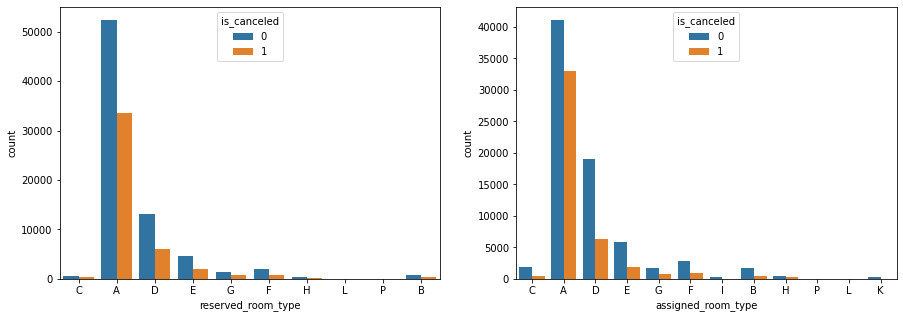

In [51]:
fig,ax = plt.subplots(1,2, figsize=(15,5))

sns.countplot(x='reserved_room_type',hue='is_canceled',data=data,ax=ax[0])
sns.countplot(x='assigned_room_type',hue='is_canceled',data=data,ax=ax[1])

In [47]:
data.assigned_room_type.value_counts()

A    74053
D    25322
E     7806
F     3751
G     2553
C     2375
B     2163
H      712
I      363
K      279
P       12
L        1
Name: assigned_room_type, dtype: int64

In [46]:
room_type = ['A','B','C','D','E','F','G','H','I','K','L','P']
len(room_type)

12